In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image, display

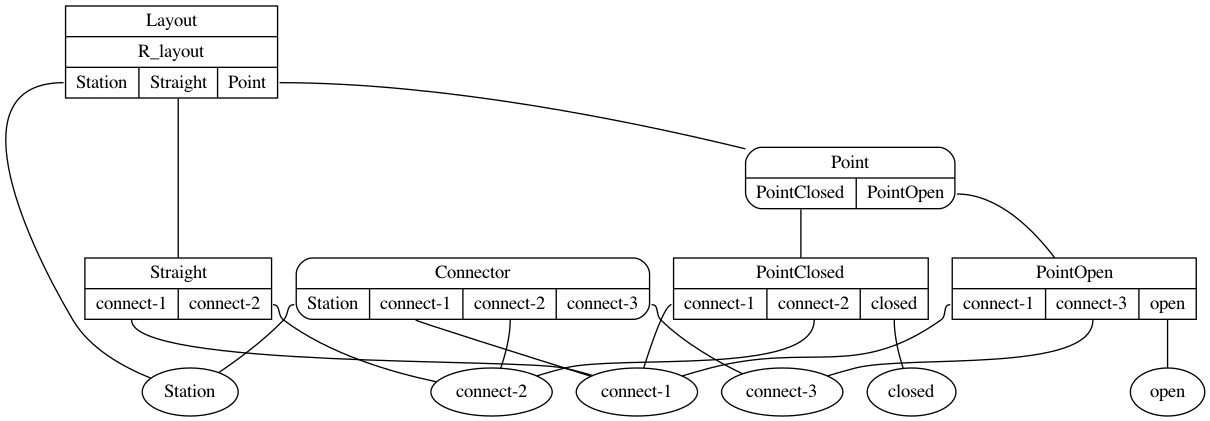

In [2]:
railway = Hypernetwork()

parser = load_parser()
compile_hn(railway, parser, """
    Layout=<Station, Straight, Point; R_layout>
    Straight=<connect-1, connect-2>
    Point={PointClosed, PointOpen}
    PointClosed=<connect-1, connect-2, closed>
    PointOpen=<connect-1, connect-3, open>
    Connector={Station, connect-1, connect-2, connect-3}
""")

"""
railwayConcrete = Hn.Hypernetwork()

parse_Hs(railwayConcrete, parser, "layout=<stationA, stationB, stationC, stationD, "
                          "straight1, straight2, straight3, straight4, "
                          "point1, point2; R_layout>")
parse_Hs(railwayConcrete, parser, "straight1=<stationA, connect1>")
parse_Hs(railwayConcrete, parser, "straight2=<connect2, stationB>")
parse_Hs(railwayConcrete, parser, "straight3=<stationC, connect3>")
parse_Hs(railwayConcrete, parser, "straight4=<connect5, stationD>")
parse_Hs(railwayConcrete, parser, "point1={<connect1, connect2, closed>, <connect1, connect3, open>}")
parse_Hs(railwayConcrete, parser, "point2={<connect4, connect5, closed>, <connect4, connect3, open>}")

railwayConcrete.to_graph(direction="LR")
"""
"""
parse_Hs(railwayConcrete, parser, "point1={point1closed, point1open}")
parse_Hs(railwayConcrete, parser, "point2={point2closed, point2open}")
parse_Hs(railwayConcrete, parser, "point1closed=<connect1, connect2, closed>")
parse_Hs(railwayConcrete, parser, "point1open=<connect1, connect3, open>")
parse_Hs(railwayConcrete, parser, "point2closed=<connect4, connect5, closed>")
parse_Hs(railwayConcrete, parser, "point2open=<connect4, connect3, open>")

railwayConcrete.to_graph(direction="LR", R="layout")
"""

draw_hn(railway, fname="/tmp/train", view=False)
Image(filename='/tmp/train.png', width=500, height=500)